In [1]:
import numpy as np
from sklearn import linear_model
import pandas as pd

In [37]:
data = pd.read_csv('diabetes.csv', delimiter = ',')

In [38]:
print(data.shape)

(768, 9)


In [40]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data

array([[ 1., 68., 65., 58.,  1., 58.],
       [ 1., 55., 62., 58.,  1., 58.],
       [ 0., 47., 52., 51.,  0.,  0.],
       ...,
       [ 1., 60., 62., 67.,  1., 67.],
       [ 0., 31., 36., 46.,  0.,  0.],
       [ 0., 63., 44., 47.,  0.,  0.]])

In [42]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
mydata = data
mydata.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

/usr/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


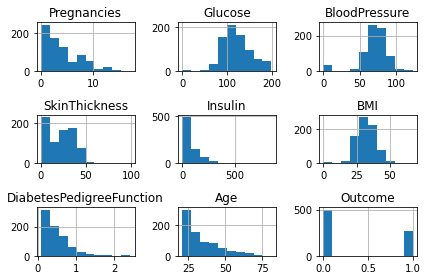

In [46]:
import pylab as pyl
import matplotlib.pyplot as plt

mydata.hist()
plt.tight_layout()


In [47]:
mydata['int']=1


In [49]:
list(mydata.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'int']

In [52]:
import statsmodels.api as sm
independentVar = list(mydata.columns)
independentVar.remove('Outcome')
modell = sm.Logit(mydata['Outcome'], mydata[independentVar])
answer =modell.fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [53]:
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 May 2021   Pseudo R-squ.:                  0.2718
Time:                        21:03:04   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
int                         -8.4047      0.717    -11.728      0.000      -9.809      -7.000
============================================================================================
"""

In [54]:
answer.params

Pregnancies                 0.123182
Glucose                     0.035164
BloodPressure              -0.013296
SkinThickness               0.000619
Insulin                    -0.001192
BMI                         0.089701
DiabetesPedigreeFunction    0.945180
Age                         0.014869
int                        -8.404696
dtype: float64

In [57]:
coeffs = answer.params
def y(int,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE):
    return coeffs[8]+ coeffs[0]*NPG + coeffs[1]*PGL + coeffs[2]*DIA + coeffs[3]*TSF + coeffs[4]*INS + coeffs[5]*BMI + coeffs[6]*DPF + coeffs[7]*AGE


In [61]:
yl= y(int, 8,196,30,38,230,45,0.180,34)
print(yl)

3.535635721244423


In [62]:
p=np.exp(yl)/(1+np.exp(yl))
print(p)

0.9716848828743604
